In [1]:
import numpy as np
import matplotlib.pyplot as plt

nx = 10
ny = 10


Tipo_Cond = [0,0,0,1]  #0 para temperatura, 1 para flujo de calor
Cond_contor = [75,100,50,0]
#  [izquierda, arriba, derecha, abajo]



n = nx * ny
beta = nx/ny 


Matriz = np.eye(n,n)
Vector_B = np.zeros(n)


In [2]:

for i in range (1,nx-1):
    for j in range (1,ny-1):
        k = i + j * nx
        Matriz[k,k] = -2 * (beta**2 + 1) 
        Matriz[k,k+nx] = beta**2
        Matriz[k,k-nx] = beta**2
        Matriz[k,k-1] = 1
        Matriz[k,k+1] = 1


In [3]:
esquinas = np.zeros(4)
esquinas[0] = 0
esquinas[1] = nx-1
esquinas[2] = (ny-1)*nx
esquinas[3] = (nx-1) + (ny-1)*nx

In [4]:
Ta = Cond_contor [0] #izquierda
Tb = Cond_contor[1] #arriba
Tc = Cond_contor [2] #derecha
Td = Cond_contor [3] #abajo
flujo = 0

T_prod1 = (Ta+Td)/2
T_prod2 = (Ta+Tb)/2
T_prod3 = (Tc+Tb)/2
T_prod4 = (Tc+Td)/2
T_prom = [T_prod1,T_prod2,T_prod3,T_prod4]

l = 0

# for i in range (nx):
#     for j in range (ny):
#         k = i + j * nx
#         if k in esquinas:
#             Vector_B[k] = T_prom[l]
#             l += 1
#         elif i == 0 and 0<j<ny-1:
#             Vector_B[k] = Ta
#         elif i == nx-1 and 0<j<ny-1:         
#             Vector_B[k] = Tc
#         elif 0<i<nx-1 and j == 0:
#             Vector_B[k] = Td
#         elif 0<i<nx-1 and j == ny-1:
#             Vector_B[k] = Tb   

for i in range (nx):
    for j in range (ny):
        k = i + j * nx
        # if k in esquinas:
        #     Vector_B[k] = T_prom[l]
        #     l += 1
        if i == 0 :
            if Tipo_Cond[0] == 0:
                Vector_B[k] = Ta

            elif Tipo_Cond[0] == 1:            
                Matriz[k,k]=-2*(1+beta**2)
                Matriz[k,k+1]=2
                Matriz[k,k+nx]=beta**2
                Matriz[k,k-nx]=beta**2              
                Vector_B[k] = flujo              
        elif i == nx-1 : 
            if Tipo_Cond[2] == 0:
                Vector_B[k] = Tc

            elif Tipo_Cond[2] == 1:            
                Matriz[k,k]=-2*(1+beta**2)
                Matriz[k,k+1]=2
                Matriz[k,k+nx]=beta**2
                Matriz[k,k-nx]=beta**2              
                Vector_B[k] = flujo                   

        elif j == 0:
            if Tipo_Cond[3] == 0:
                Vector_B[k] = Td

            elif Tipo_Cond[3] == 1:            
                Matriz[k,k]=-2*(1+beta**2)
                Matriz[k,k+1]=2
                Matriz[k,k+nx]=beta**2
                Matriz[k,k-nx]=beta**2              
                Vector_B[k] = flujo                   

            
        elif j == ny-1:
            if Tipo_Cond[1] == 0:
                Vector_B[k] = Tb

            elif Tipo_Cond[1] == 1:            
                Matriz[k,k]=-2*(1+beta**2)
                Matriz[k,k+1]=2
                Matriz[k,k+nx]=beta**2
                Matriz[k,k-nx]=beta**2              
                Vector_B[k] = flujo                   
                 

Vector_B[0]= Ta 
Vector_B[nx-1]= Tc 
Vector_B[-(nx)]= (Tb+Ta)/2
Vector_B[-1]=(Tc+Tb)/2 


Vector_A = Vector_B           
print(Vector_B)

[ 75.    0.    0.    0.    0.    0.    0.    0.    0.   50.   75.    0.
   0.    0.    0.    0.    0.    0.    0.   50.   75.    0.    0.    0.
   0.    0.    0.    0.    0.   50.   75.    0.    0.    0.    0.    0.
   0.    0.    0.   50.   75.    0.    0.    0.    0.    0.    0.    0.
   0.   50.   75.    0.    0.    0.    0.    0.    0.    0.    0.   50.
  75.    0.    0.    0.    0.    0.    0.    0.    0.   50.   75.    0.
   0.    0.    0.    0.    0.    0.    0.   50.   75.    0.    0.    0.
   0.    0.    0.    0.    0.   50.   87.5 100.  100.  100.  100.  100.
 100.  100.  100.   75. ]


[[ 75.          91.62099242  91.82094317  90.91901431  89.05144121
   86.07851452  81.64109257  75.08636837  65.25568363  50.        ]
 [ 75.          82.84208332  85.44574405  85.57317483  84.04873582
   81.03187292  76.39163354  69.83410622  61.02273454  50.        ]
 [ 75.          79.30159682  81.54677488  81.87920512  80.53845432
   77.60860782  73.05946246  66.83568842  59.00114831  50.        ]
 [ 75.          77.81752909  79.56055355  79.85841643  78.61726854
   75.80464157  71.40192004  65.44803669  58.14617027  50.        ]
 [ 75.          77.40796599  79.01949378  79.37663853  78.26756183
   75.59076988  71.29553946  65.40836803  58.13549607  50.        ]
 [ 75.          77.79484109  79.73281704  80.36108209  79.48557036
   76.99533665  72.78109988  66.75439992  58.98744598  50.        ]
 [ 75.          79.03858135  81.75585118  82.84930244  82.31830089
   80.12390648  76.07912349  69.84068578  61.05988792  50.        ]
 [ 75.          81.60363311  85.4027039   86.9619756   

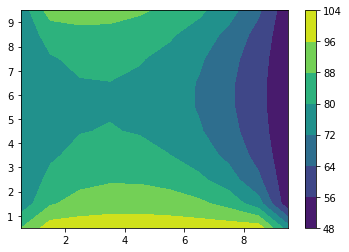

In [5]:
T = np.linalg.solve(Matriz,Vector_B)
Matriz_Temp = np.zeros([nx,ny])

for i in range (nx):
    for j in range (ny):
        k = i + j * nx
        #Matriz_Temp[ny-1-j,i] = T[k]
        #Matriz_Temp[ny-1,nx-1] = T_prod4 
        #Matriz_Temp[0,nx-1] = T_prod3 
        Matriz_Temp[j,i] = T[k]
        
        
        
print(Matriz_Temp)
plt.contourf(Matriz_Temp, origin = 'upper')
plt.colorbar()

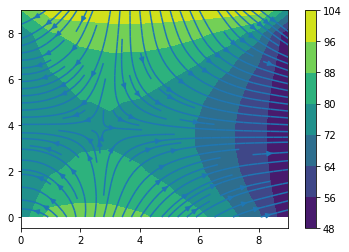

In [6]:
dx = 1/(nx+1)
dy = 1/(ny+1)
Flujox = np.zeros([nx,ny]) 
Flujoy = np.zeros([nx,ny])

x = np.linspace(0,nx-1,nx).astype(int)
y = np.linspace(0,ny-1,ny).astype(int)
X,Y = np.meshgrid(x,y)


# for i in range (1,nx-1):
#    for j in range (1,ny-1):
#        Flujoy [j,i] = (Matriz_Temp[j+1,i]-Matriz_Temp[j-1,i])/(2*dx)
#        Flujox [j,i] = (Matriz_Temp[j,i+1]-Matriz_Temp[j,i-1])/(2*dy)
        

        
# for i in range (nx):
#    for j in range (ny):
#        X[j,i] = i
#        Y[j,i] = j
#         X[j,i] = i*dx
#         Y[j,i] = j*dy

for i in range (nx-1):
    for j in range (ny-1):
        k = i + j * nx
        if k == esquinas[0]:
            Flujoy[j,i] = (Matriz_Temp[j+1,i]-Matriz_Temp[j,i])/(dx)
            Flujox[j,i] = (Matriz_Temp[j,i+1]-Matriz_Temp[j,i])/(dy)
        elif k == esquinas[1]:
            Flujoy[j,i] = (Matriz_Temp[j+1,i]-Matriz_Temp[j,i])/(dx)
            Flujox[j,i] = (Matriz_Temp[j,i]-Matriz_Temp[j,i-1])/(dx)
        elif k == esquinas[2]:
            Flujoy[j,i] = (Matriz_Temp[j,i]-Matriz_Temp[j-1,i])/(dx)
            Flujox[j,i] = (Matriz_Temp[j,i]-Matriz_Temp[j,i-1])/(dx)
        elif k == esquinas[3]:
            Flujoy[j,i] = (Matriz_Temp[j,i]-Matriz_Temp[j-1,i])/(dx)
            Flujox[j,i] = (Matriz_Temp[j,i+1]-Matriz_Temp[j,i])/(dx)         
        elif i == 0 :
            Flujoy [j,i] = (Matriz_Temp[j+1,i]-Matriz_Temp[j-1,i])/(2*dx)
            Flujox[j,i] = (Matriz_Temp[j,i+1]-Matriz_Temp[j,i])/(dx)
        elif i == nx-1 :         
            Flujoy [j,i] = (Matriz_Temp[j+1,i]-Matriz_Temp[j-1,i])/(2*dx)
            Flujox[j,i] = (Matriz_Temp[j,i]-Matriz_Temp[j,i-1])/(dx)
        elif j == 0:
            Flujoy[j,i] = (Matriz_Temp[j+1,i]-Matriz_Temp[j,i])/(dx)
            Flujox [j,i] = (Matriz_Temp[j,i+1]-Matriz_Temp[j,i-1])/(2*dy)
        elif j == ny-1:          
            Flujoy[j,i] = (Matriz_Temp[j+1,i]-Matriz_Temp[j,i])/(dx)
            Flujox [j,i] = (Matriz_Temp[j,i+1]-Matriz_Temp[j,i-1])/(2*dy)
        else:
            Flujoy [j,i] = (Matriz_Temp[j+1,i]-Matriz_Temp[j-1,i])/(2*dx)
            Flujox [j,i] = (Matriz_Temp[j,i+1]-Matriz_Temp[j,i-1])/(2*dy)

plt.contourf(X,Y,Matriz_Temp, origin = 'upper')
plt.colorbar()        
plt.streamplot(X,Y,-Flujox,-Flujoy)

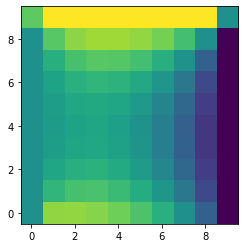

In [ ]:
plt.imshow(Matriz_Temp, origin = 'lower')

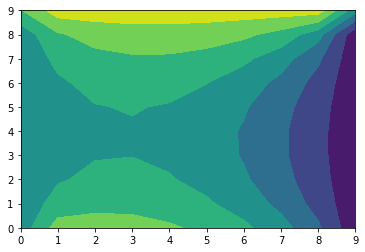

In [ ]:
plt.contourf(X,Y,Matriz_Temp, origin = 'upper')